In [3]:
from pprint import pprint
import seaborn as sns
import numpy as np
import sqlalchemy as sql
from matplotlib import pyplot as plt


from utils.data_storage.dataframe2sql import read_pkl_sql
from utils.config.loaders import get_sql_types

In [4]:
ls *.db

benchmarks.db        debug.db                  hp_scans_iflow.db  sine.db
benchmarks-debug.db  hp_scans_checkerboard.db  pretty_plots.db


In [5]:
print(sql.create_engine("sqlite:///hp_scans_checkerboard.db").table_names())
print(sql.create_engine("sqlite:///hp_scans_iflow.db").table_names())

['camel_grid_scan']
['camel_grid_scan']


In [4]:
dtypes = get_sql_types()
dtypes["value_history"] = sql.PickleType
df_cb = read_pkl_sql("hp_scans_checkerboard.db","camel_grid_scan",dtypes=dtypes)
df_if = read_pkl_sql("hp_scans_iflow.db","camel_grid_scan",dtypes=dtypes)

In [8]:
best_cb = df_cb.loc[df_cb.groupby("d")["variance_ratio"].idxmax().values]

In [9]:
best_cb

,value,target,value_std,target_std,sigma_cutoff,sigmas_off,percent_difference,variance_ratio,match,value_history,...,betas,eps,lr,checkpoint,checkpoint_on_cuda,s,norm,d,git_info,extra_data
350,0.004615,0.004641,5.309282e-06,0.000071,3,0.379636,0.580056,176.390501,True,integral error n_points phase \ 0 ...,...,"(0.9, 0.999)",1.000000e-08,0.00010,True,False,0.3,1.0,8,d394448ccb0044735ea17e61add9c09ac33b1fa2:85fdc...,()
1190,0.000010,0.000031,8.213377e-07,0.000020,3,1.040862,100.457619,568.492965,True,integral error n_points phase \...,...,"(0.9, 0.999)",1.000000e-08,0.00001,True,False,0.3,1.0,16,d394448ccb0044735ea17e61add9c09ac33b1fa2:85fdc...,()


[]

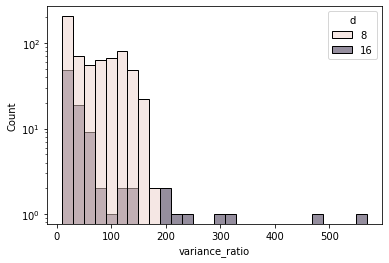

In [10]:
df_cb_good = df_cb.loc[df_cb["variance_ratio"] >= 10.]
ax = sns.histplot(data = df_cb_good, x="variance_ratio", hue="d")
ax.set(yscale="log")
plt.plot()

[None]

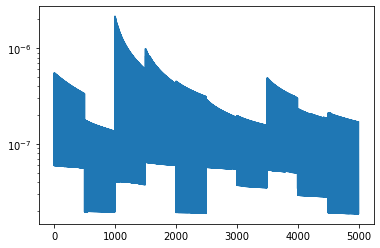

In [11]:
fig,ax = plt.subplots() 
ax.plot(best_cb.iloc[1]["value_history"]["training record"].apply(lambda x: x["metrics"]["loss"]).sum())
ax.set(yscale="log")

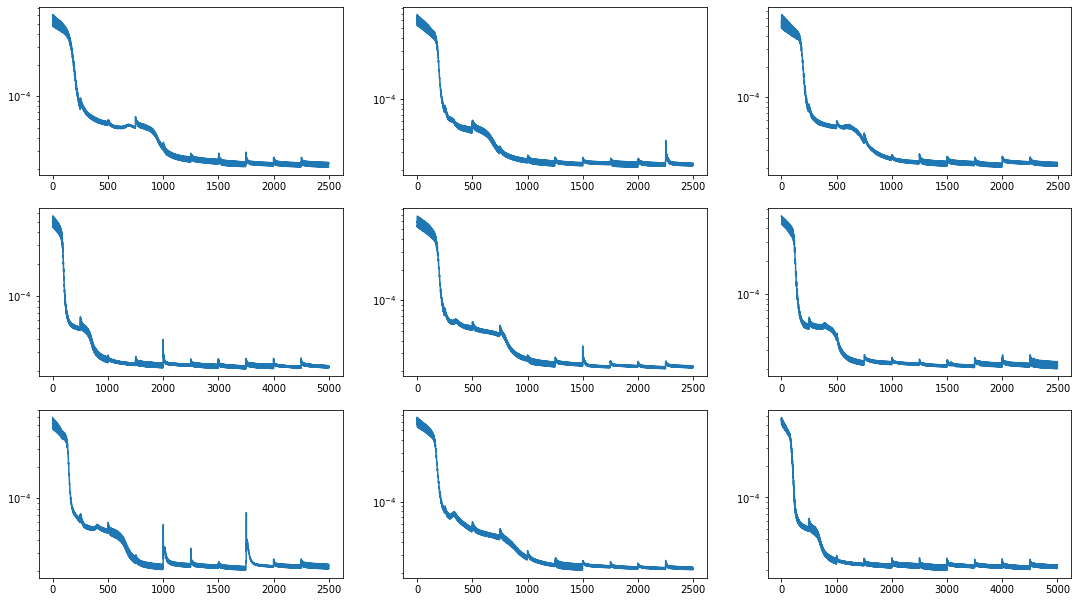

In [17]:
df_cb8 = df_cb.loc[df_cb["d"] == 8].sort_values("variance_ratio", ascending=False)
n = 3
fig,axes = plt.subplots(n,n)
fig.set_size_inches(18.5, 10.5, forward=True)
for i in range(n):
    for j in range(n):
        axes[i,j].plot(df_cb8.iloc[i*n + j]["value_history"]["training record"].apply(lambda x: x["metrics"]["loss"]).sum())
        axes[i,j].set(yscale="log")
plt.show()

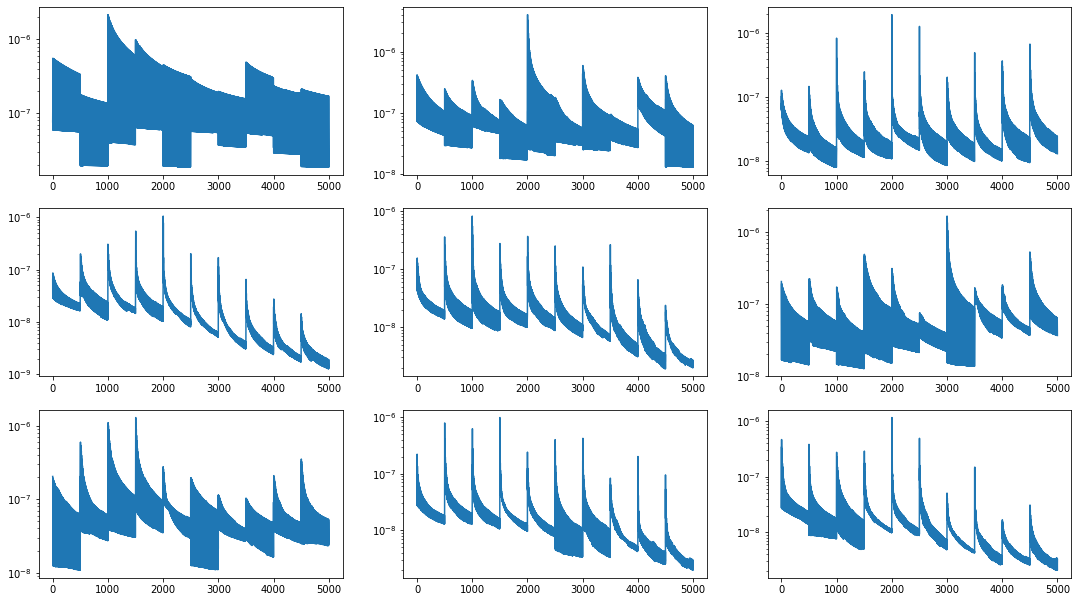

In [18]:
df_cb16 = df_cb.loc[df_cb["d"] == 16].sort_values("variance_ratio", ascending=False)
n = 3
fig,axes = plt.subplots(n,n)
fig.set_size_inches(18.5, 10.5, forward=True)
for i in range(n):
    for j in range(n):
        axes[i,j].plot(df_cb16.iloc[i*n + j]["value_history"]["training record"].apply(lambda x: x["metrics"]["loss"]).sum())
        axes[i,j].set(yscale="log")
plt.show()

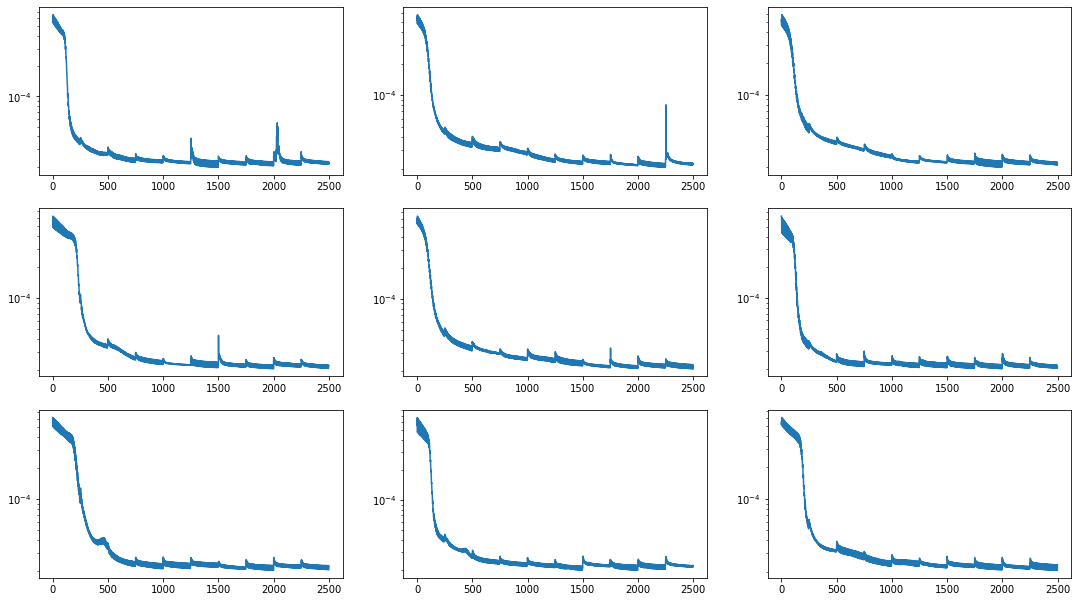

In [19]:
df_if8 = df_if.loc[df_if["d"] == 8].sort_values("variance_ratio", ascending=False)
n = 3
fig,axes = plt.subplots(n,n)
fig.set_size_inches(18.5, 10.5, forward=True)
for i in range(n):
    for j in range(n):
        axes[i,j].plot(df_if8.iloc[i*n + j]["value_history"]["training record"].apply(lambda x: x["metrics"]["loss"]).sum())
        axes[i,j].set(yscale="log")
plt.show()

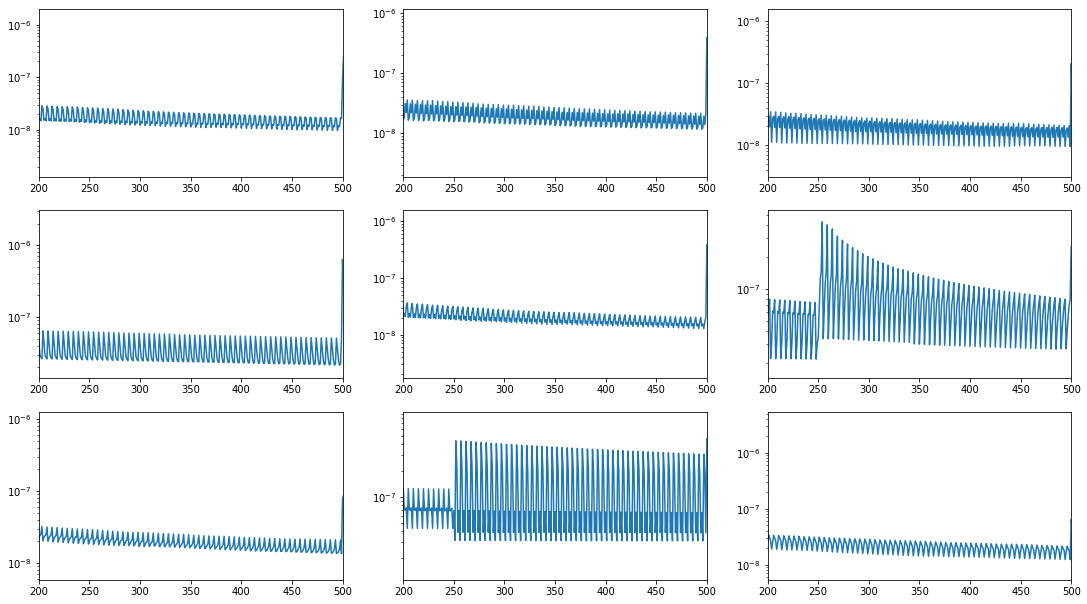

In [92]:
df_if16 = df_if.loc[df_if["d"] == 16].sort_values("variance_ratio", ascending=False)
n = 3
fig,axes = plt.subplots(n,n)
fig.set_size_inches(18.5, 10.5, forward=True)
for i in range(n):
    for j in range(n):
        axes[i,j].plot(df_if16.iloc[i*n + j]["value_history"]["training record"].apply(lambda x: x["metrics"]["loss"]).sum())
        axes[i,j].set(yscale="log", xlim=[200,500])
plt.show()

In [29]:
df_if8.iloc[0]["variance_ratio"]/df_cb8.iloc[0]["variance_ratio"]

0.9308456174284534

In [30]:
df_if16.iloc[0]["variance_ratio"]/df_cb16.iloc[0]["variance_ratio"]

1.526904601552331

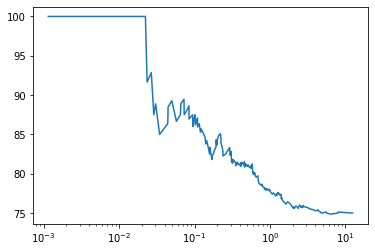

In [72]:
fig ,ax = plt.subplots()
ax.plot(1/df_if16["variance_ratio"].values, np.cumsum(df_if16["n_epochs"])/(1+np.arange(len(df_if16))))
ax.set(xscale="log")
plt.show()

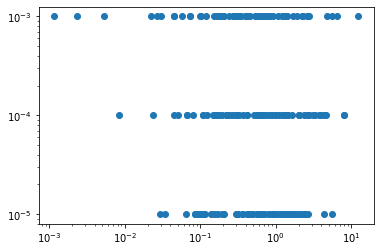

In [79]:
fig ,ax = plt.subplots()
ax.scatter(1/df_if16["variance_ratio"],df_if16["lr"])
ax.set(xscale="log",yscale="log")
plt.show()

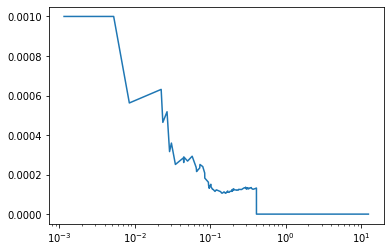

In [81]:
fig ,ax = plt.subplots()
ax.plot(1/df_if16["variance_ratio"].values, np.cumprod(df_if16["lr"])**(1./(1+np.arange(len(df_if16)))))
ax.set(xscale="log")
plt.show()

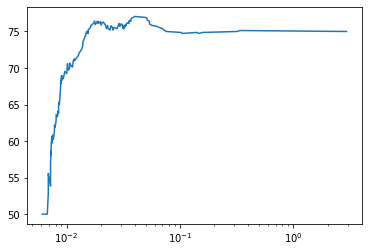

In [71]:
fig ,ax = plt.subplots()
ax.plot(1/df_if8["variance_ratio"],np.cumsum(df_if8["n_epochs"])/(1+np.arange(len(df_if8))))
ax.set(xscale="log")
plt.show()

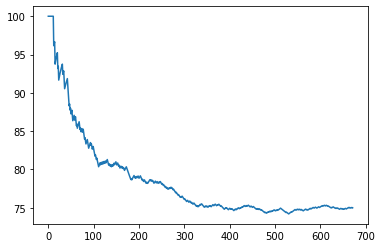

In [55]:
plt.plot(np.cumsum(df_cb16["n_epochs"].values)/(1+np.arange(len(df_cb16))))

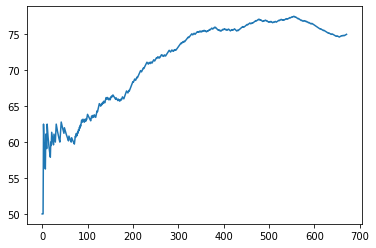

In [56]:
plt.plot(np.cumsum(df_cb8["n_epochs"].values)/(1+np.arange(len(df_cb8))))

In [120]:
scan_cols = ['d',"lr","n_hidden","d_hidden","n_epochs"]
tgt_cols = ["variance_ratio"]

In [6]:
stat_cb = df_cb.groupby(['d',"lr","n_hidden","d_hidden","n_epochs"]).agg(["mean", "std"])

In [7]:
stat_if = df_if.groupby(['d',"lr","n_hidden","d_hidden","n_epochs"]).agg(["mean", "std"])

In [21]:
vr_if = stat_if[["variance_ratio"]]
vr_cb = stat_cb[["variance_ratio"]]

In [37]:
vr = vr_if.merge(vr_cb, left_index=True,right_index=True, suffixes=("_if","_cb")).reset_index()
vr.columns = [("_".join(col)).strip("_") for col in vr.columns]

In [42]:
cols = []
for i in [-1,0,1]:
    for j in [-1,0,1]:
        cols.append(f"if/cb [{i},{j}]")
        vr[f"if/cb [{i},{j}]"] = (vr["variance_ratio_if_mean"] + i* vr["variance_ratio_if_std"])/(vr["variance_ratio_cb_mean"] + j* vr["variance_ratio_cb_std"])   

In [60]:
vr["if/cb +"] = vr.apply(lambda x: max(x[cols]), axis=1)
vr["if/cb -"] = vr.apply(lambda x: min(x[cols]), axis=1)
vr["if/cb"] = 0.5*(vr["if/cb +"] + vr["if/cb -"])

In [67]:
vr["if/cb +"][:10]

0    1.996347
1    2.821151
2    2.535671
3    2.404497
4    1.963086
5    3.290983
6    4.290024
7    5.544284
8    1.620327
9    2.266184
Name: if/cb +, dtype: float64

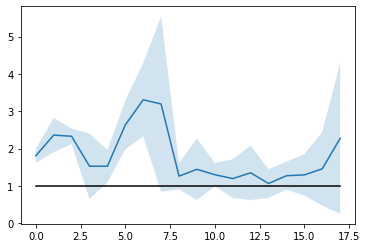

In [75]:
n=18
plt.fill_between(vr.index[:n], vr["if/cb +"][:n], vr["if/cb -"][:n], alpha=.2)
plt.plot(vr["if/cb"][:n])
plt.plot([1]*len(vr[:n]), c="black")
plt.show()

In [77]:
vr16 = vr[vr["d"]==16]

In [163]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, explained_variance_score, median_absolute_error

In [176]:
Xcols = [c for c in scan_cols if c != "d"]
yif = "variance_ratio_if_mean"
ycb = "variance_ratio_cb_mean"

In [182]:
model_if = Pipeline([
    ("scaler", StandardScaler()),
    ("lin", Lasso())
])
model_if.fit(vr16[Xcols],vr16[yif])
print(Xcols)
model_if[1].coef_

['lr', 'n_hidden', 'd_hidden', 'n_epochs']


array([10.18825234, -8.37199305,  1.1961011 ,  8.36451738])

In [181]:
print(explained_variance_score(vr16[yif], model_if.predict(vr16[Xcols])))
print(median_absolute_error(vr16[yif], model_if.predict(vr16[Xcols])))
print(vr16[yif].mean())

0.38846045974428167
11.19320160936493
12.95599958206848


In [183]:
model_cb = Pipeline([
    ("scaler", StandardScaler()),
    ("lin", Lasso())
])
model_cb.fit(vr16[Xcols],vr16[ycb])

print(Xcols)
model_if[1].coef_

['lr', 'n_hidden', 'd_hidden', 'n_epochs']


array([10.18825234, -8.37199305,  1.1961011 ,  8.36451738])

In [185]:
print(explained_variance_score(vr16[ycb], model_cb.predict(vr16[Xcols])))
print(median_absolute_error(vr16[ycb], model_cb.predict(vr16[Xcols])))
print(vr16[ycb].mean())

0.3761713807520499
3.0647136319520873
9.865393911581304
